# Lab 5 (Week 3) - Statisitical Inference



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Probability Density Functions

We can represent the relative likelihood of every possible value of a continuous variable *x* using a probability density function. Actual probabilities are computed from the area under the curve. 

The total area under the curve is 1, which simply means that all possibilities are included:

$$P(-\infty < x < +\infty) = \int_{-\infty}^{+\infty} \mathcal{PDF} (x) dx = 1$$

The probability of a random sample being less than or equal to some value *x<sub>1</sub>* is:

$$P(x \leq x_1) = \int_{-\infty}^{x_1} \mathcal{PDF} (x) dx$$

The probability of a random sample being greater than some value *x<sub>1</sub>* is therefore:

$$P(x > x_1) = 1 - \int_{-\infty}^{x_1} \mathcal{PDF} (x) dx$$

The probability of a random sample being between *x<sub>1</sub>* and *x<sub>2</sub>* is:

$$P(x_1 \lt x \leq x_2) = \int_{x_1}^{x_2} \mathcal{PDF} (x) dx$$

Nb. When we calculate the area under the $\mathcal{PDF}$ curve by integrating the function, as above, we are computing the cumulative density. We can do this with an indefinite integral to derive the **cumulative distribution function** (CDF).

## The Normal Distribution

The most commonly occurring PDF is the normal (or Gaussian) distribution:

$$\mathcal{N}(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \int_{-\infty}^{x} \exp \Big(-\frac{(x-\mu)^2}{2\sigma^2}\Big) dx$$

where $\mu$ is the mean value of the distribution and $\sigma$ is the standard deviation.

The CDF of the normal distribution is:

$$F(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \int_{-\infty}^{x} \exp \Big(-\frac{(t-\mu)^2}{2\sigma^2}\Big) dt$$

### The Standard Normal Distribution

If we transform a variable *x* so as to "standardise" it, we will get the **standard normal distribution**, which hwas a mean of 0 and a standard deviation of 1:

$$z = \frac{x-\mu}{\sigma}$$

If we don't know the true population mean and standard deviation (i.e. we are working with a finite set of sample data) we must use the standard error of the mean instead of the standard deviation, so replace $\sigma$ with $s \Big/ \sqrt{n} $  (where $s$ is the sample standard deviation). Allso, $\mu$ is replaced by the sample mean $\overline{X}$.

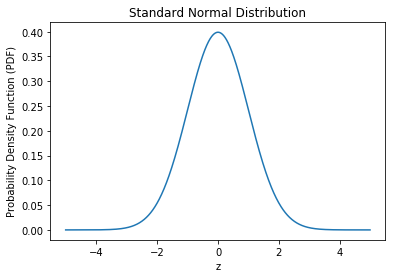

In [2]:
# credit: Sebastian Raschka (https://github.com/rasbt/data-science-tutorial)
def univariate_gaussian_pdf(x, mean, variance):
    return (1. / np.sqrt(2 * np.pi * variance) * 
            np.exp(- ((x - mean) ** 2 / 2. * variance)))

mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)
y = univariate_gaussian_pdf(x, mean, stddev ** 2)
plt.plot(x, y)
plt.xlabel('z')
plt.ylabel('Probability Density Function (PDF)')
plt.title('Standard Normal Distribution')
plt.show()

The result of this transformation is that the horizontal axis (which represents the possible sample values) is now expressed in terms of the standard deviation: a *z* value of 1 means an *x* value of $\sigma$, a *z* value of 2 means an *x* value of 2$\sigma$, and so on. So, we can now talk in general terms about how far a value is from the mean by using this ***z* statistic**, and we can compute the probability of this sample occurring using the area under the curve.

Note that the area under the curve between -2$\sigma$ and +2$\sigma$ is approximately 0.95. This means that 95% of samples occur within this band. This is where the '*p* < 0.05' criterion comes from. 

In [3]:
# credit: Sebastian Raschka (https://github.com/rasbt/data-science-tutorial)
from scipy.integrate import quad

def gaussian_cdf_helper(t, mean, variance):
    return (1. / (np.sqrt(2. * np.pi * variance)) * np.exp(-(t - mean)**2 / (2. * variance)))

def gaussian_cdf(x, mean, variance):
    sd = 1
    mean =0
    out = []
    for val in x:
        integ = (quad(gaussian_cdf_helper, -np.inf, val, args=(mean, variance))[0])
        out.append(integ)
    return out

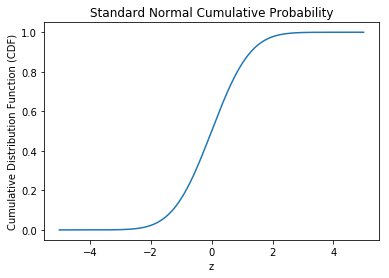

In [4]:
mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)

y = gaussian_cdf(x, mean, stddev**2)
plt.plot(x, y)
plt.xlabel('z')
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.title('Standard Normal Cumulative Probability')
plt.show()


Let $\alpha$ be the threshold for significance (typically 0.05). Then, if we want to know the likelihood that a sample is greater than *z* we use a one-tailed test in which the area of the tail is $\alpha$. Alternatively, if we want to know the likelihood that a sample is outside the range [-*z*, *z*], we use a two-tailed test in which the area of each tail is $\alpha$/2.

In Python, we can easily compute probabilities from *z*-values and vice versa. To get the *z*-value for a one-tailed test on a standard normal distribution, we pass an argument of (1 - $\alpha$) to the ppf function. So, for $\alpha$ = 0.05:

In [6]:
import scipy.stats as st
st.norm.ppf(.95)

1.6448536269514722

Or about 1.64 standard deviations. Conversely, to get the probability that a *z*-value exceeds 1.64 standard deviations:

In [8]:
st.norm.cdf(1.645)

0.9500150944608786

<img src="files/lab5-one-sided.png", style="width: 300px;">

To get the *z*-values for a two-tailed test on a standard normal distribution, we pass an argument of ($\alpha$/2) for the negative tail, and (1 - $\alpha$/2) for the positive tail. So, for $\alpha$ = 0.05:

In [9]:
print('{}, {}'.format(st.norm.ppf(.025), st.norm.ppf(.975)))

-1.9599639845400545, 1.959963984540054


To get the get the probability that a *z*-value differs from zero by more than 1.96 standard deviations (plus or minus):

In [10]:
2 * (1 - st.norm.cdf(1.96))

0.04999579029644097

<img src="files/lab5-two-sided.png", style="width: 300px;">

## The t-Distribution

The methods shown above are theoretical, in that they apply to idealised mathematical functions. A real data sets is a finite sample of an unknown distribution, and can never yield perfect knowledge of the underlying population. In order to estimate the mean when the sample size is small and the standard deviation of the population is unknown, we need to correct the test statistic based on a new $\mathcal{PDF}$ called the *t-distribution*:

<img src="files/lab5-t-dist.png", style="width: 600px;">

The t-distribution approaches the normal distribution as the number of degrees of freedom $\nu$ approaches $\infty$. (Nb. $\nu$ is related to the number of samples $n$. For the unmodified *t*-test it is $n - 1$, but this assumes the variances of the population and the test sample are the same.) As $\nu$ gets smaller the distribution becomes more broad (i.e. more weight goes into the tails).

### Student's *t*-Test

To calculate the likelihood that a value belongs to a sampled distribution we employ the same methods as above, but we use the *t*-statistic instead of the *z*-statistic:

<img src="files/lab5-image1.gif", style="width: 600px;">

In the above example, $t_0$ is the *t*-value of the sample mean and $t_{obs}$ is the new value we are testing. We don't need to standardise the variable first because the transformation is built into the computation of the *t*-statistic.

**Practical Example:** We will synthesise some data on the distribution of ages in a large population, then in a smaller one, and test the null hypothesis (specifically, that there is no difference in the means). To mke things more interesting, each data set (the population and the test sample) will be synthesised from two separate randomly sampled normal distributions with different means, so that the resulting distributions will not be normal.

In [6]:
?stats.poisson.rvs

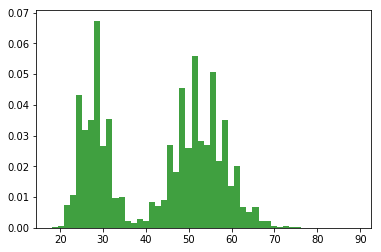

In [7]:
# credit: http://hamelg.blogspot.com.au/2015/11/python-for-data-analysis-part-24.html
np.random.seed(6)

# large population:
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))
n1, bins1, patches1 = plt.hist(population_ages, 50, normed=1, facecolor='green', alpha=0.75)


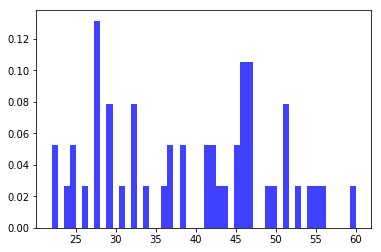

In [8]:
# test sample:
minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))
n2, bins2, patches2 = plt.hist(minnesota_ages, 50, normed=1, facecolor='blue', alpha=0.75)

In [20]:
print('Population mean age = {}, Test mean age = {}'.format(population_ages.mean(), minnesota_ages.mean()))


Population mean age = 43.000112, Test mean age = 39.26


We are testing one estimate of a new sample mean against a population mean, so we use the following function:

In [22]:
stats.ttest_1samp(a= minnesota_ages,               # Sample data
                 popmean= population_ages.mean())  # Pop mean

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

For the difference to be significant (i.e. to reject the null hypothesis), this *t*-statistic needs to be outside the area under the curve between our specified quantiles. If we choose $\alpha$ = 0.05 then we have 0.025 in each tail. Also, 50 samples gives 49 degrees of freedom for the second parameter. Finally, we will look at the left tail because the *t*-statistic is negative (the test mean is less than the population mean):

In [25]:
stats.t.ppf(q=0.025, df=49)  # t-distribution probability vs. Quantile, Degrees of freedom

-2.0095752344892093

The *t*-statistic (-2.5742) is less than the 0.025 quantile (-2.0096), so we reject the null hypothesis and say we believe the sample is from different population.

To get the actual *p*-value of our result:

In [26]:
stats.t.cdf(x=-2.5742, df= 49) * 2     # t-test statistic Mupltiply by two for two-tailed test*

0.013121066545690117

So, we estimate a 1.3% probability that we have erroneously rejected the null hypothesis.

**Exercise:** Copy the cells that build and test the data sets, then experiment by modifying the input data.

1. For both data sets, make the mean of the secondary distribution closer to that of the primary, so that the distribution is less bimodal. Does this have any effect on the tests?

2. Make the mean of the primary distribution of the test data set closer to that of the population data set. How close does it need to be before the null hypothesis is upheld (i.e. the difference is no longer significant at $p=0.05)$?

3. Vary the size of the test data set. How does this affect the *t*-statistic (and, hence, the disposition of the null hypothesis)?